In [1]:
#2. Apply the dimensionality reduction algorithms to the two datasets and describe what you see.

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA
from scipy.stats import kurtosis, pearsonr

from preprocessor import preprocess_dodgers, preprocess_wine_combo

import time 
random_state = 1337

In [2]:
# Uncomment one set to choose which dataset to use

X_train, X_test, y_train, y_test = preprocess_dodgers()
dataset_name = "Dodgers"

# X_train, X_test, y_train, y_test, X_train_color, X_test_color = preprocess_wine_combo()
# dataset_name = "Wine"
# y_train = X_train_color
# dataset_name = "Wine"

range_n_components = range(1, X_train.shape[1])  # can't have more components than features in data

release_speed kurtosis: 0.025965972640586088
vy0 kurtosis: 0.04635239004035707
plate_z kurtosis: -0.08975246187274077
pfx_z kurtosis: 0.11001355653312528
vz0 kurtosis: -0.19958056102325683
sz_top kurtosis: 0.2331510591059769
plate_x kurtosis: -0.28535050270373974
balls kurtosis: 0.4066428244178639
ay kurtosis: -0.5387251130368611
az kurtosis: -0.5658779074821143
sz_bot kurtosis: 0.6215729269800088
7 kurtosis: -0.6477847938011352
ax kurtosis: -0.8241301591963204
vx0 kurtosis: -0.9022719116497964
at_bat_number kurtosis: -0.9330760127696394
release_pos_y kurtosis: 1.0522685860164884
pfx_x kurtosis: -1.061991225609457
strikes kurtosis: -1.1397311881783263
pitch_number kurtosis: 1.1634343189717482
4 kurtosis: -1.3931978135670735
release_pos_x kurtosis: -1.4199635698296087
release_spin_rate kurtosis: 1.6935206316646267
9 kurtosis: -1.763520802962927
10 kurtosis: -1.763520802962927
8 kurtosis: 2.2587902736626946
release_pos_z kurtosis: 2.755780131894319
3 kurtosis: 9.14203961656119
2 kurtosis

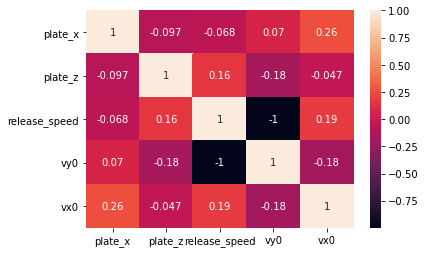

In [5]:
# X_train = X_train.drop(["release_speed", "vy0"], axis=1)
# range_n_components = range(1, X_train.shape[1])  # can't have more components than features in data

In [6]:
total_explained_variances = {}
times = {}
eigenvalues = {}
pca = {}

for n_components in range_n_components:
    start_time = time.time()

    pca = PCA(n_components=n_components).fit(X_train)
    end_time = time.time()
    times[n_components] = end_time-start_time

    total_explained_variances[n_components] = np.sum(pca.explained_variance_ratio_)
    eigenvalues[n_components] = pca.explained_variance_[-1]

In [7]:
# marginal explained variance per nth component
final_explained_variances = dict(enumerate(pca.explained_variance_ratio_, start=1))
cum_expvar = 0.0
n_comps_95 = 0
for expvar in pca.explained_variance_ratio_:
    cum_expvar += expvar
    n_comps_95 += 1
    if cum_expvar > 0.95:
        break
print(f"need {n_comps_95} to explain 95% of variance")

final_explained_variances

need 20 to explain 95% of variance


{1: 0.17412106254249707,
 2: 0.11320007046776423,
 3: 0.07096001158006066,
 4: 0.06365921435607674,
 5: 0.0551074886611485,
 6: 0.048780940316621335,
 7: 0.04673953763683713,
 8: 0.043918894147497195,
 9: 0.038326334831577206,
 10: 0.03570729666903994,
 11: 0.03419780622321181,
 12: 0.03278259814195269,
 13: 0.03116824082258876,
 14: 0.030759390237646022,
 15: 0.027746609782654683,
 16: 0.025116310052929285,
 17: 0.02471120558094252,
 18: 0.02175343268939056,
 19: 0.02018305097532484,
 20: 0.019330532232617065,
 21: 0.012319738592821297,
 22: 0.009509748116864605,
 23: 0.00840663513434724,
 24: 0.006484224925383533,
 25: 0.003676061427279012,
 26: 0.0009840247539467772,
 27: 0.0001692891108213411,
 28: 0.00011533365200730482,
 29: 4.2263301626624344e-05,
 30: 1.8873863601036003e-05,
 31: 3.7791729230634524e-06,
 32: 7.29417643159073e-33}

In [8]:
# look at what features make up the first principal component
first_component_features = abs( pca.components_[0] )
print(first_component_features)
first_component_features_indices = sorted(range(len(first_component_features)), key=lambda k: first_component_features[k])[::-1]
print(first_component_features_indices)
print(X_train.columns[first_component_features_indices])

[0.37901014 0.14679528 0.05085523 0.02410408 0.05618531 0.18214296
 0.33097798 0.16080789 0.37814496 0.25074045 0.19862712 0.33512938
 0.34207662 0.03203955 0.0246765  0.32233166 0.08488273 0.05337112
 0.01307758 0.01792151 0.03752603 0.05590331 0.03521947 0.00727835
 0.14777582 0.02141345 0.10226676 0.00405979 0.0518482  0.05889453
 0.05797271 0.10260846 0.10260846]
[0, 8, 12, 11, 6, 15, 9, 10, 5, 7, 24, 1, 32, 31, 26, 16, 29, 30, 4, 21, 17, 28, 2, 20, 22, 13, 14, 3, 25, 19, 18, 23, 27]
Index([    'release_speed',               'vy0',                'az',
                      'ay',             'pfx_z',   'effective_speed',
                     'vz0',                'ax',             'pfx_x',
                     'vx0',                   2,     'release_pos_x',
                        10,                   9,                   4,
       'release_spin_rate',                   7,                   8,
                 'strikes',           'plate_z',     'release_pos_y',
                 

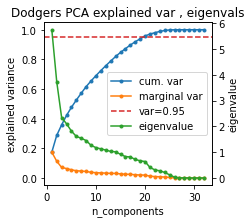

In [9]:
fig = plt.figure(figsize=(3,3))

ax = fig.add_subplot(111)
plt.title(f"{dataset_name} PCA explained var , eigenvals")
plt.ylabel("explained variance")
plt.xlabel("n_components")
ax.plot(list(total_explained_variances.keys()), list(total_explained_variances.values()), marker='.', label="cum. var")

ax.plot(list(final_explained_variances.keys()), list(final_explained_variances.values()), marker='.', c='C1', label="marginal var")

ax.axhline(0.95, label="var=0.95", c="C3", linestyle='--')

ax2=plt.twinx()
ax2.plot(list(eigenvalues.keys()), list(eigenvalues.values()), c="C2", marker='.', label="eigenvalue")
ax2.set_ylabel("eigenvalue")
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc="center right")
#plt.legend()
plt.show()


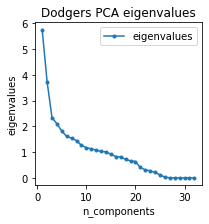

In [10]:
fig = plt.figure(figsize=(3,3))

ax = fig.add_subplot(111)
plt.title(f"{dataset_name} PCA eigenvalues")
plt.ylabel("eigenvalues")
plt.xlabel("n_components")
ax.plot(list(eigenvalues.keys()), list(eigenvalues.values()), marker='.', label="eigenvalues")

# ax2=plt.twinx()
# ax2.plot(list(times.keys()), list(times.values()), marker='o', c='C1', label="time (s)")
# ax2.set_ylabel("time (s)")

# ax2 = plt.twinx()
# ax2.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o', c='C1', label="avg silhouette")
# ax2.set_ylabel("silhouette")

# https://stackoverflow.com/a/10129461
lines, labels = ax.get_legend_handles_labels()
#lines2, labels2 = ax2.get_legend_handles_labels()
#ax.legend(lines + lines2, labels + labels2, loc="center right")
plt.legend()

plt.show()

In [12]:
final_PCA = PCA(n_components=n_comps_95).fit(X_train)
X_train_transformed = pd.DataFrame(final_PCA.transform(X_train))
X_train_transformed.to_csv(f"output/{dataset_name}/pca-train-transformed.csv")

X_test_transformed = pd.DataFrame(final_PCA.transform(X_test))
X_test_transformed.to_csv(f"output/{dataset_name}/pca-test-transformed.csv")

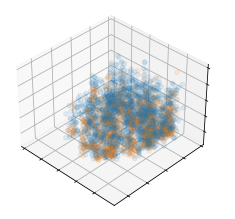

In [13]:
# Code source: Gaël Varoquaux https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html
# License: BSD 3 clause
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition

centers = [[1, 1], [-1, -1], [1, -1]]

fig = plt.figure(1, figsize=(3, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=36, azim=134)

plt.cla()
X = X_train_transformed

colors = {"ball":'C0', "called_strike":'C1', 'red':'C1', 'white':'C0'}

ax.scatter(X[0], X[1], X[2], c=[colors[val] for val in y_train], cmap=plt.cm.nipy_spectral, alpha=0.1)

# ax.set_xlabel("1st eigenv.")
ax.w_xaxis.set_ticklabels([])
# ax.set_ylabel("2nd eigenv.")
ax.w_yaxis.set_ticklabels([])
# ax.set_zlabel("3rd eigenv.")
ax.w_zaxis.set_ticklabels([])

plt.show()

pca comp #0:
[0.37901014 0.14679528 0.05085523 0.02410408 0.05618531 0.18214296
 0.33097798 0.16080789 0.37814496 0.25074045 0.19862712 0.33512938
 0.34207662 0.03203955 0.0246765  0.32233166 0.08488273 0.05337112
 0.01307758 0.01792151 0.03752603 0.05590331 0.03521947 0.00727835
 0.14777582 0.02141345 0.10226676 0.00405979 0.0518482  0.05889453
 0.05797271 0.10260846 0.10260846]
[0, 8, 12, 11, 6, 15, 9, 10, 5, 7, 24, 1, 31, 32, 26, 16, 29, 30, 4, 21, 17, 28, 2, 20, 22, 13, 14, 3, 25, 19, 18, 23, 27]
Index([    'release_speed',               'vy0',                'az',
                      'ay',             'pfx_z',   'effective_speed',
                     'vz0',                'ax',             'pfx_x',
                     'vx0',                   2,     'release_pos_x',
                         9,                  10,                   4,
       'release_spin_rate',                   7,                   8,
                 'strikes',           'plate_z',     'release_pos_y',
    

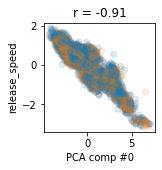

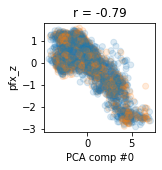

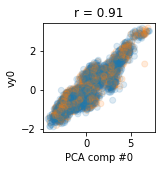

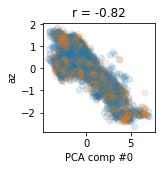

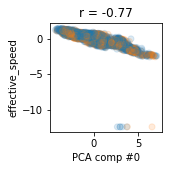

pca comp #1:
[0.11917364 0.39842476 0.2080584  0.01923941 0.04404545 0.32320103
 0.18450209 0.41028703 0.12077977 0.02008664 0.34824575 0.11067007
 0.17319812 0.01167782 0.00068325 0.11610143 0.04725212 0.06609284
 0.02054322 0.03753005 0.00999133 0.06813733 0.02743043 0.02309709
 0.07785604 0.07484729 0.1886879  0.08676503 0.04050473 0.01245034
 0.04384971 0.32366647 0.32366647]
[7, 1, 10, 32, 31, 5, 2, 26, 6, 12, 8, 0, 15, 11, 27, 24, 25, 21, 17, 16, 4, 30, 28, 19, 22, 23, 18, 9, 3, 29, 13, 20, 14]
Index([              'vx0',     'release_pos_x',                'ax',
                        10,                   9,             'pfx_x',
           'release_pos_z',                   4,             'pfx_z',
                      'az',               'vy0',     'release_speed',
         'effective_speed',                'ay',                   5,
                         2,                   3,           'plate_z',
           'release_pos_y', 'release_spin_rate',           'strikes',
    

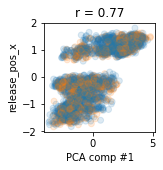

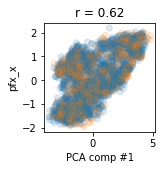

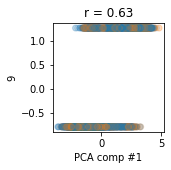

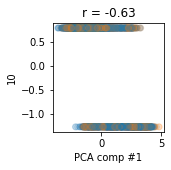

pca comp #2:
[0.0349128  0.01654019 0.10123142 0.50648531 0.48155579 0.10772846
 0.00231275 0.01022904 0.03385795 0.00616945 0.09737277 0.01634309
 0.00400786 0.08212326 0.0631259  0.05035859 0.05001402 0.16157933
 0.0888108  0.60721274 0.09851748 0.05273636 0.06607054 0.03824064
 0.10065197 0.07543536 0.05728158 0.03229688 0.06927851 0.00565336
 0.00082254 0.08778005 0.08778005]
[19, 3, 4, 17, 5, 2, 24, 20, 10, 18, 31, 32, 13, 25, 28, 22, 14, 26, 21, 15, 16, 23, 0, 8, 27, 1, 11, 7, 9, 29, 12, 6, 30]
Index([     'pitch_number',             'balls',           'strikes',
           'release_pos_y',             'pfx_x',     'release_pos_z',
                         2,           'plate_x',                'ax',
           'at_bat_number',                   9,                  10,
                  'sz_top',                   3,                   6,
                         0,            'sz_bot',                   4,
                 'plate_z',   'effective_speed', 'release_spin_rate',
    

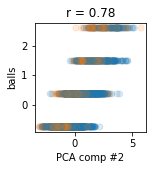

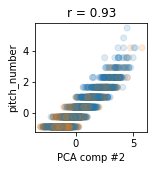

pca comp #3:
[0.09974053 0.06944033 0.32048476 0.12535877 0.19300541 0.24661081
 0.11677821 0.01600697 0.10080905 0.25695989 0.2017286  0.06913555
 0.13716962 0.09397066 0.10397011 0.11505826 0.02814715 0.28574039
 0.23048345 0.19473551 0.02089568 0.11360735 0.00336505 0.05886173
 0.14843869 0.17126511 0.23968104 0.05405292 0.14450159 0.23981838
 0.06476135 0.31373418 0.31373418]
[2, 32, 31, 17, 9, 5, 29, 26, 18, 10, 19, 4, 25, 24, 28, 12, 3, 6, 15, 21, 14, 8, 0, 13, 1, 11, 30, 23, 27, 16, 20, 7, 22]
Index([    'release_pos_z',                  10,                   9,
           'release_pos_y',               'vz0',             'pfx_x',
                         7,                   4,     'at_bat_number',
                      'ax',      'pitch_number',           'strikes',
                         3,                   2,                   6,
                      'az',             'balls',             'pfx_z',
         'effective_speed',           'plate_z',            'sz_bot',
    

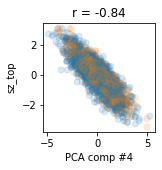

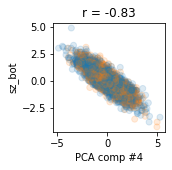

pca comp #5:
[0.05850694 0.01363121 0.20036211 0.11695197 0.05998994 0.22267947
 0.10787417 0.02144822 0.06104964 0.36955702 0.20754671 0.06254094
 0.1266255  0.27799215 0.29069897 0.05906047 0.17141811 0.10479871
 0.06554746 0.10804635 0.29995445 0.31068853 0.029511   0.00913458
 0.11895314 0.18373764 0.11177492 0.01573141 0.01312082 0.31513398
 0.23031177 0.16081834 0.16081834]
[9, 29, 21, 20, 14, 13, 30, 5, 10, 2, 25, 16, 31, 32, 12, 24, 3, 26, 19, 6, 17, 18, 11, 8, 4, 15, 0, 22, 7, 27, 1, 28, 23]
Index([              'vz0',                   7,           'plate_z',
                 'plate_x',            'sz_bot',            'sz_top',
                         8,             'pfx_x',                'ax',
           'release_pos_z',                   3, 'release_spin_rate',
                         9,                  10,                'az',
                         2,             'balls',                   4,
            'pitch_number',             'pfx_z',     'release_pos_y',
    

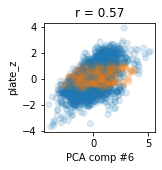

pca comp #7:
[0.04968135 0.13728816 0.0778452  0.00633439 0.06752743 0.05638202
 0.03298532 0.13854386 0.05663296 0.3243304  0.02775694 0.10025334
 0.02378798 0.04192537 0.02339588 0.04476279 0.39938241 0.01741691
 0.0371227  0.05525876 0.13990478 0.46538222 0.19587836 0.03272717
 0.20355721 0.22626182 0.33378446 0.23875162 0.01886517 0.31977394
 0.12980925 0.00801085 0.00801085]
[21, 16, 26, 9, 29, 27, 25, 24, 22, 20, 7, 1, 30, 11, 2, 4, 8, 5, 19, 0, 15, 13, 18, 6, 23, 10, 12, 14, 28, 17, 31, 32, 3]
Index([          'plate_z', 'release_spin_rate',                   4,
                     'vz0',                   7,                   5,
                         3,                   2,                   0,
                 'plate_x',               'vx0',     'release_pos_x',
                         8,                'ay',     'release_pos_z',
                 'strikes',               'vy0',             'pfx_x',
            'pitch_number',     'release_speed',   'effective_speed',
    

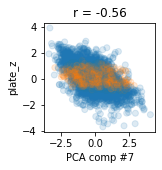

pca comp #8:
[0.05566973 0.18425146 0.07832141 0.06555127 0.02161408 0.05349411
 0.01708871 0.1727785  0.05749021 0.00561424 0.06083275 0.11582577
 0.01168485 0.05653975 0.06480592 0.03209109 0.24971995 0.3245971
 0.50682086 0.0553151  0.0498608  0.0441817  0.36055862 0.06051992
 0.03458232 0.2607109  0.14333808 0.0038519  0.25627382 0.27470696
 0.10142274 0.20386853 0.20386853]
[18, 22, 17, 29, 25, 28, 16, 32, 31, 1, 7, 26, 11, 30, 2, 3, 14, 10, 23, 8, 13, 0, 19, 5, 20, 21, 24, 15, 4, 6, 12, 9, 27]
Index([    'at_bat_number',                   0,     'release_pos_y',
                         7,                   3,                   6,
       'release_spin_rate',                  10,                   9,
           'release_pos_x',               'vx0',                   4,
                      'ay',                   8,     'release_pos_z',
                   'balls',            'sz_bot',                'ax',
                         1,               'vy0',            'sz_top',
     

pca comp #9:
[0.00471682 0.01964133 0.2139214  0.00567475 0.07465122 0.0116096
 0.08775693 0.05963015 0.00902562 0.02075332 0.02496696 0.03100722
 0.07715606 0.00198296 0.00693748 0.00275196 0.10949078 0.04728155
 0.08353789 0.04187986 0.18640493 0.20686454 0.09462607 0.09092453
 0.01590238 0.27202257 0.4073371  0.26309074 0.39597824 0.18767494
 0.54226247 0.08816775 0.08816775]
[30, 26, 28, 25, 27, 2, 21, 29, 20, 16, 22, 23, 32, 31, 6, 18, 12, 4, 7, 17, 19, 11, 10, 9, 1, 24, 5, 8, 14, 3, 0, 15, 13]
Index([                  8,                   4,                   6,
                         3,                   5,     'release_pos_z',
                 'plate_z',                   7,           'plate_x',
       'release_spin_rate',                   0,                   1,
                        10,                   9,             'pfx_z',
           'at_bat_number',                'az',           'strikes',
                     'vx0',     'release_pos_y',      'pitch_number',
     

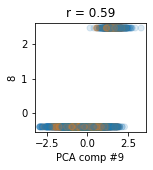

pca comp #10:
[0.00904534 0.0258751  0.05944203 0.01973293 0.02398346 0.10619838
 0.00193124 0.15003723 0.0094351  0.02432068 0.08346303 0.00229963
 0.00211094 0.03830036 0.00458401 0.03481458 0.06257797 0.10659545
 0.1510096  0.00152975 0.56297794 0.05799434 0.01469473 0.02030501
 0.05868888 0.01809273 0.00907331 0.13776127 0.55185187 0.42858042
 0.28369815 0.00459899 0.00459899]
[20, 28, 29, 30, 18, 7, 27, 17, 5, 10, 16, 2, 24, 21, 13, 15, 1, 9, 4, 23, 3, 25, 22, 8, 26, 0, 31, 32, 14, 11, 12, 6, 19]
Index([          'plate_x',                   6,                   7,
                         8,     'at_bat_number',               'vx0',
                         5,     'release_pos_y',             'pfx_x',
                      'ax', 'release_spin_rate',     'release_pos_z',
                         2,           'plate_z',            'sz_top',
         'effective_speed',     'release_pos_x',               'vz0',
                 'strikes',                   1,             'balls',
   

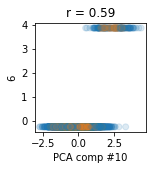

pca comp #11:
[0.06327594 0.10825436 0.18193124 0.02452557 0.009462   0.02596279
 0.08423597 0.19628202 0.06407753 0.18579534 0.02133699 0.02139748
 0.09954095 0.02785878 0.03410816 0.06371557 0.0963128  0.1210278
 0.04582416 0.01758492 0.32585686 0.10488831 0.06541428 0.1360075
 0.29826394 0.48473629 0.13100169 0.04916367 0.03454036 0.11585703
 0.56675044 0.03948953 0.03948953]
[30, 25, 20, 24, 7, 9, 2, 23, 26, 17, 29, 1, 21, 12, 16, 6, 22, 8, 15, 0, 27, 18, 32, 31, 28, 14, 13, 5, 3, 11, 10, 19, 4]
Index([                  8,                   3,           'plate_x',
                         2,               'vx0',               'vz0',
           'release_pos_z',                   1,                   4,
           'release_pos_y',                   7,     'release_pos_x',
                 'plate_z',                'az', 'release_spin_rate',
                   'pfx_z',                   0,               'vy0',
         'effective_speed',     'release_speed',                   5,
     

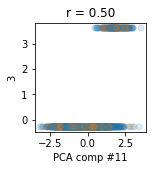

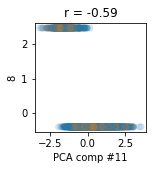

pca comp #12:
[0.02068402 0.01729842 0.10679251 0.0148583  0.02182399 0.04220285
 0.01116757 0.00142614 0.02212285 0.0296315  0.02714086 0.03470179
 0.02789247 0.00412881 0.0226619  0.01803815 0.10075218 0.11942583
 0.18195459 0.00142819 0.07150773 0.03943857 0.72446969 0.17798749
 0.00101906 0.11838868 0.13913649 0.53860677 0.11962927 0.02618572
 0.1344177  0.0390856  0.0390856 ]
[22, 27, 18, 23, 26, 30, 28, 17, 25, 2, 16, 20, 5, 21, 32, 31, 11, 9, 12, 10, 29, 14, 8, 4, 0, 15, 1, 3, 6, 13, 19, 7, 24]
Index([                  0,                   5,     'at_bat_number',
                         1,                   4,                   8,
                         6,     'release_pos_y',                   3,
           'release_pos_z', 'release_spin_rate',           'plate_x',
                   'pfx_x',           'plate_z',                  10,
                         9,                'ay',               'vz0',
                      'az',                'ax',                   7,
   

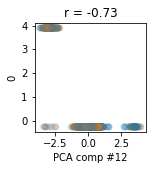

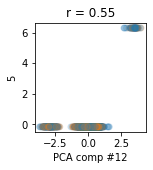

pca comp #13:
[1.05147284e-02 1.39509449e-02 6.54550482e-02 2.38245689e-02
 2.99020484e-02 5.43606380e-03 1.52163659e-02 7.61832134e-02
 1.16525454e-02 8.94550973e-02 5.55023227e-03 1.58693298e-02
 6.56205018e-04 1.75880988e-02 1.08678703e-03 2.04592268e-02
 4.33753464e-02 6.58795877e-04 9.32561906e-02 5.02337278e-03
 1.81807174e-01 9.06134373e-02 1.01309248e-01 8.89214057e-01
 9.36243381e-02 4.06324917e-02 1.36896886e-01 2.37160798e-01
 1.55380050e-01 9.79264245e-02 4.33901617e-02 4.94072125e-02
 4.94072125e-02]
[23, 27, 20, 28, 26, 22, 29, 24, 18, 21, 9, 7, 2, 31, 32, 30, 16, 25, 4, 3, 15, 13, 11, 6, 1, 8, 0, 10, 5, 19, 14, 17, 12]
Index([                  1,                   5,           'plate_x',
                         6,                   4,                   0,
                         7,                   2,     'at_bat_number',
                 'plate_z',               'vz0',               'vx0',
           'release_pos_z',                   9,                  10,
        

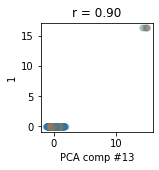

pca comp #14:
[0.07779048 0.13540701 0.28153599 0.04267206 0.00351906 0.07037057
 0.0551227  0.05874614 0.07988392 0.10014316 0.04501538 0.08409607
 0.0421679  0.00763628 0.00565189 0.15350032 0.11695261 0.10950136
 0.28714994 0.02363355 0.03595907 0.02917905 0.32337033 0.14994201
 0.42499419 0.0486124  0.27504208 0.41544255 0.16047764 0.32730006
 0.1611368  0.04578142 0.04578142]
[24, 27, 29, 22, 18, 2, 26, 30, 28, 15, 23, 1, 16, 17, 9, 11, 8, 0, 5, 7, 6, 25, 32, 31, 10, 3, 12, 20, 21, 19, 13, 14, 4]
Index([                  2,                   5,                   7,
                         0,     'at_bat_number',     'release_pos_z',
                         4,                   8,                   6,
         'effective_speed',                   1,     'release_pos_x',
       'release_spin_rate',     'release_pos_y',               'vz0',
                      'ay',               'vy0',     'release_speed',
                   'pfx_x',               'vx0',             'pfx_z',
   

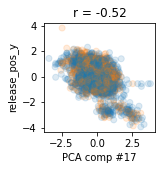

pca comp #18:
[0.03377237 0.12954186 0.18522584 0.43080522 0.42214028 0.08268187
 0.0434073  0.01891573 0.03530394 0.02333924 0.06927109 0.11134134
 0.02377759 0.04595749 0.02632628 0.03234598 0.4303755  0.0047856
 0.14329857 0.00098437 0.12244047 0.05462508 0.18947381 0.03212082
 0.26828763 0.11960265 0.08355476 0.36723388 0.08076274 0.12050986
 0.10039065 0.12560822 0.12560822]
[3, 16, 4, 27, 24, 22, 2, 18, 1, 32, 31, 20, 29, 25, 11, 30, 26, 5, 28, 10, 21, 13, 6, 8, 0, 15, 23, 14, 12, 9, 7, 17, 19]
Index([            'balls', 'release_spin_rate',           'strikes',
                         5,                   2,                   0,
           'release_pos_z',     'at_bat_number',     'release_pos_x',
                        10,                   9,           'plate_x',
                         7,                   3,                'ay',
                         8,                   4,             'pfx_x',
                         6,                'ax',           'plate_z',
    

In [14]:
colors = {"ball":'C0', "called_strike":'C1', 'red':'C1', 'white':'C0'}
c = [colors[val] for val in y_train]

for comp_i in X_train_transformed:
    first_component_features = abs( final_PCA.components_[comp_i] )
    print(f"pca comp #{comp_i}:")
    print(first_component_features)
    first_component_features_indices = sorted(range(len(first_component_features)), key=lambda k: first_component_features[k])[::-1]
    print(first_component_features_indices)
    print(X_train.columns[first_component_features_indices])
    
    for orig_feature_i in range(X_train.shape[1]):
        fig = plt.figure(figsize=(2,2))
        X = X_train_transformed[comp_i]
        Y = X_train.iloc[:,orig_feature_i]
        r = pearsonr(X, Y)[0]
        plt.scatter(X, Y, c=c, alpha=0.15)
        plt.title(f"r = {r:.2f}")
        plt.xlabel(f"PCA comp #{comp_i}")
        plt.ylabel(X_train.columns[orig_feature_i])
        if abs(r) > 0.5:
            plt.show()
        else:
            plt.close()

In [ ]:
X_train_transformed